In [89]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [90]:
# Load the ECG dataset
data = pd.read_csv("http://storage.googleapis.com/download.tensorflow.org/data/ecg.csv",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [91]:
# Preprocess the data
scaler = StandardScaler()
X = scaler.fit_transform(data.values)
y = X  # Autoencoder input and output are the same

X_train, X_test, _, _ = train_test_split(X, X, test_size=0.2, random_state=42)

In [92]:
# Build and train the Autoencoder model
input_dim = X_train.shape[1]

In [71]:
encoder = keras.Sequential([
    keras.layers.Input(shape=(input_dim,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(8, activation='relu')
])

In [72]:
decoder = keras.Sequential([
    keras.layers.Input(shape=(8,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(input_dim, activation='linear')  # Use linear activation for reconstruction
])

In [93]:
autoencoder = keras.models.Sequential([
    encoder,
    decoder
])


autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])
autoencoder.fit(X_train, X_train,validation_data=(X_test,X_test), epochs=100, batch_size=32, shuffle=True)

Epoch 1/100
125/125 [==============================] - 1s 3ms/step - loss: 0.1066 - mse: 0.1066 - val_loss: 0.1155 - val_mse: 0.1155
Epoch 2/100
125/125 [==============================] - 0s 2ms/step - loss: 0.1058 - mse: 0.1058 - val_loss: 0.1136 - val_mse: 0.1136
Epoch 3/100
125/125 [==============================] - 0s 2ms/step - loss: 0.1059 - mse: 0.1059 - val_loss: 0.1161 - val_mse: 0.1161
Epoch 4/100
125/125 [==============================] - 0s 2ms/step - loss: 0.1057 - mse: 0.1057 - val_loss: 0.1135 - val_mse: 0.1135
Epoch 5/100
125/125 [==============================] - 0s 2ms/step - loss: 0.1050 - mse: 0.1050 - val_loss: 0.1149 - val_mse: 0.1149
Epoch 6/100
125/125 [==============================] - 0s 2ms/step - loss: 0.1048 - mse: 0.1048 - val_loss: 0.1135 - val_mse: 0.1135
Epoch 7/100
125/125 [==============================] - 0s 2ms/step - loss: 0.1042 - mse: 0.1042 - val_loss: 0.1137 - val_mse: 0.1137
Epoch 8/100
125/125 [==============================] - 0s 2ms/step - 

125/125 [==============================] - 0s 2ms/step - loss: 0.0975 - mse: 0.0975 - val_loss: 0.1093 - val_mse: 0.1093
Epoch 63/100
125/125 [==============================] - 0s 2ms/step - loss: 0.0973 - mse: 0.0973 - val_loss: 0.1113 - val_mse: 0.1113
Epoch 64/100
125/125 [==============================] - 0s 2ms/step - loss: 0.0971 - mse: 0.0971 - val_loss: 0.1096 - val_mse: 0.1096
Epoch 65/100
125/125 [==============================] - 0s 2ms/step - loss: 0.0969 - mse: 0.0969 - val_loss: 0.1098 - val_mse: 0.1098
Epoch 66/100
125/125 [==============================] - 0s 2ms/step - loss: 0.0972 - mse: 0.0972 - val_loss: 0.1094 - val_mse: 0.1094
Epoch 67/100
125/125 [==============================] - 0s 2ms/step - loss: 0.0971 - mse: 0.0971 - val_loss: 0.1094 - val_mse: 0.1094
Epoch 68/100
125/125 [==============================] - 0s 2ms/step - loss: 0.0974 - mse: 0.0974 - val_loss: 0.1078 - val_mse: 0.1078
Epoch 69/100
125/125 [==============================] - 0s 2ms/step - loss:

In [74]:
# Detect anomalies
y_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - y_pred, 2), axis=1)

32/32 [==============================] - 0s 2ms/step


In [94]:
# Define a threshold for anomaly detection
threshold = np.percentile(mse, 95)  # Adjust the percentile as needed

In [95]:
# Predict anomalies
anomalies = mse > threshold

In [96]:
# Calculate the number of anomalies
num_anomalies = np.sum(anomalies)
print(f"Number of Anomalies: {num_anomalies}")

Number of Anomalies: 50


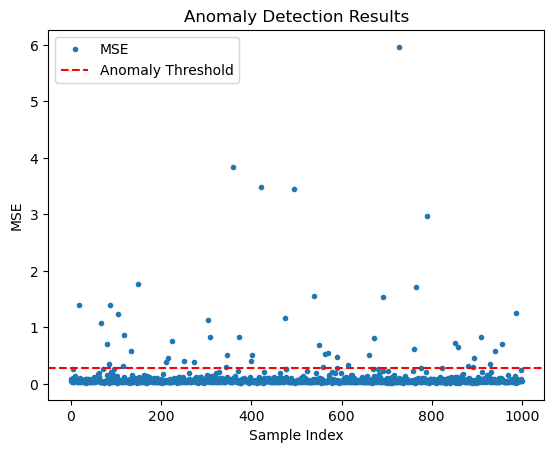

In [97]:
plt.plot(mse, marker='o', linestyle='', markersize=3, label='MSE')
plt.axhline(threshold, color='r', linestyle='--', label='Anomaly Threshold')
plt.xlabel('Sample Index')
plt.ylabel('MSE')
plt.title('Anomaly Detection Results')
plt.legend()
plt.show()

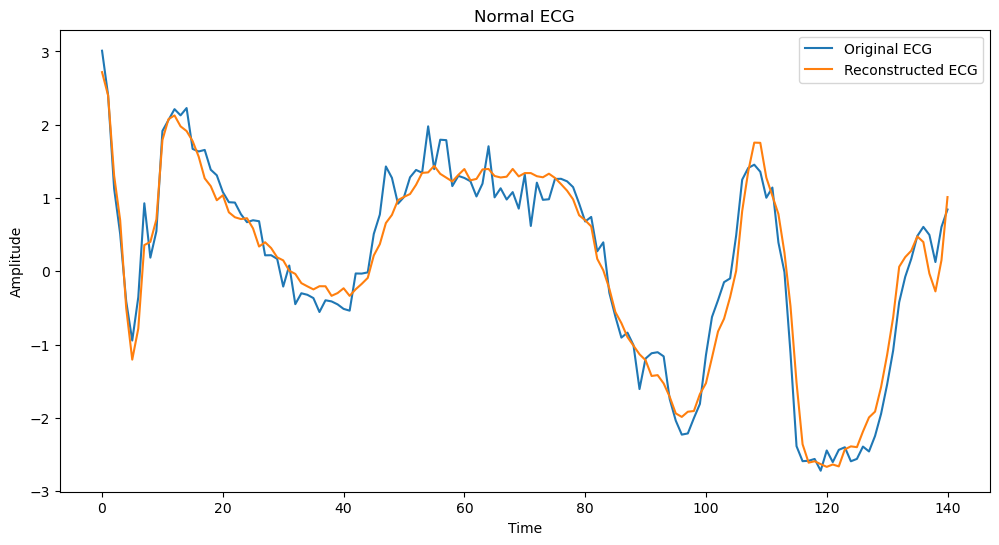

In [98]:
plt.figure(figsize=(12, 6))
plt.plot(X_test[0], label='Original ECG')
plt.plot(y_pred[0], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('Normal ECG')
plt.show()

In [99]:
# listing the index of anomalies in X_test
anomalies_index = []
for index, anomaly in enumerate(anomalies):
    if anomaly == True :
        anomalies_index.append(index)

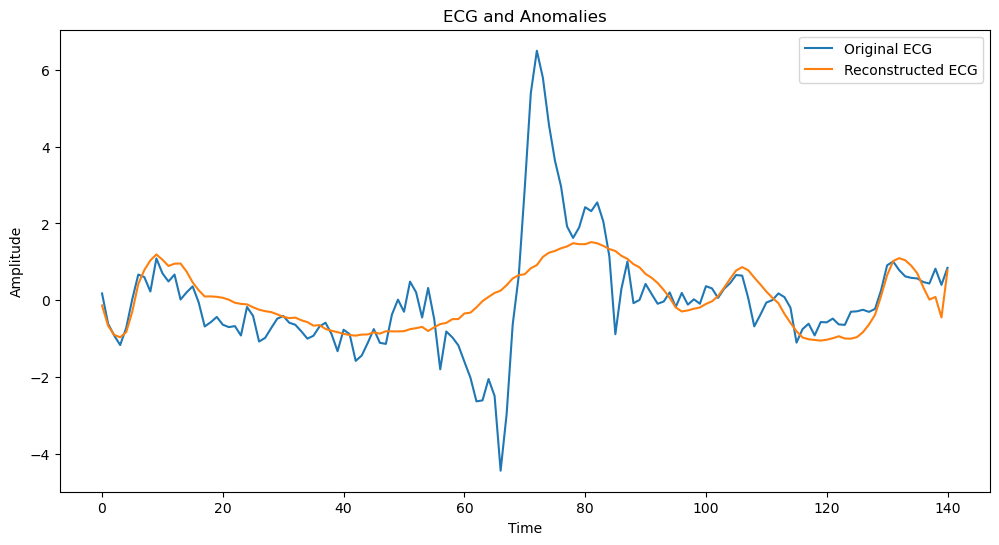

In [100]:
n = 4
anomaly_index = anomalies_index[n]
plt.plot(X_test[anomaly_index], label='Original ECG')
plt.plot(y_pred[anomaly_index], label='Reconstructed ECG')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.title('ECG and Anomalies')
plt.show()